# Practice Problem - Radioactive Decay

Radioactive decay (or radioactivity) is the process by which a nucleus of an unstable atom loses energy by emitting particles such as alpha particles (Helium nucleii) or beta particles (electrons). You can read up more about radioactive decay [here](https://en.wikipedia.org/wiki/Radioactive_decay).

In this exercise, we look at a (fake) dataset showing the rate of detection of alpha particles close to a radioactive sample, which we will call element X. The dataset used is the [data/new_decay_data.txt](data/new_decay_data.txt) file. The rate of detection of alpha particles is measured at 100 different times (given by the first column, in days since the start of the experiment), and for each of these times, both the rate of detection and the uncertainty in the rate of detection are given (in the second and third columns, in detections per second).

1 - Plot the rate of detection versus time, including error bars (see the lecture notes for an example of how to do this). Include labels on the x and y axis.

2 - The rate of decay of a radioactive element is given by:

$$R(t) = R_0~e^{-t/\tau}$$

where $R_0$ is the rate of decay at time $t=0$, and $\tau$ is the *mean lifetime* of the element. Define this function (which has two free parameters in addition to the time) as a Python function in your script, and fit it to the data using ``curve_fit``, and overplot the resulting best-fit function over the data using a line. Is the fit good? If not, what do you think is causing the fit to be bad? Print out the best-fit parameters and uncertainties as shown in the lecture notes.

3 - While one would ideally be able to measure the rate of decay in a completely isolated environment, some of the alpha detections are in fact from background radioactive decay, so we need to take this into account by considering a decay rate function that includes a constant background level term:

$$R(t) = R_0~e^{-t/\tau} + R_{\rm bkg}$$

Define this function in your script and fit it to the data using ``curve_fit``, overplotting the best-fit function over the data in a new plot. Also draw a horizontal line to show the constant background level. Does this fit look better? Print out the best-fit parameters and uncertainties.

4 - One way to quantify the *goodness* of a fit is to consider the reduced $\chi^2$ value of the fit, defined as:

$$\chi_{\rm red}^2 = \frac{1}{N - p}\sum_{i=1}^{N}~\left(\frac{y_i - m_i}{\sigma_i}\right)^2$$

where $N$ is the number of datapoints, $p$ is the number of parameters for the model, $y_i$ are the data values, $m_i$ are the model values at the same positions, and $\sigma_i$ are the uncertainties on the data $y_i$.

Conventional wisdom has it, that a fit is usually considered to be good if $\chi_{\rm red}^2 \approx 1$, and this is a decent guide. 

Compute $\chi_{\rm red}^2$ for both models above, and comment on the values. Do they agree with what you would have concluded from looking at the plots?

## Your solution here

<Container object of 3 artists>

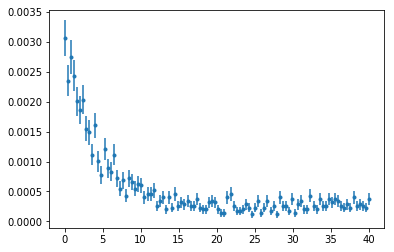

In [1]:
# your solution here
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
t, rate, erate = np.loadtxt('data/new_decay_data.txt',unpack=True)
plt.errorbar(t,rate,yerr=erate,fmt='.')

[  1.76722744e-03   1.00487280e+01]


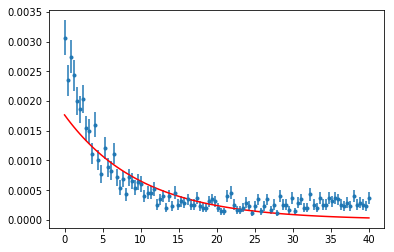

In [2]:
from scipy.optimize import curve_fit

def decay(t,r0,tau):
    decay = r0*np.exp(-t/tau)
    return decay

popt,pcov = curve_fit(decay, t, rate, sigma=erate)
print(popt)
plt.errorbar(t,rate,yerr=erate,fmt='.')
plt.plot(t,decay(t,*popt),'r-')

[  2.75675078e-03   3.99517525e+00   2.32494003e-04]


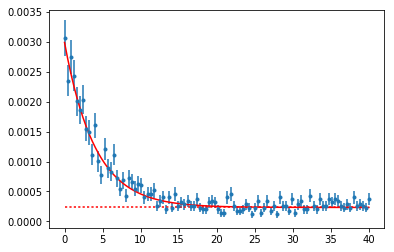

In [3]:
def decay_bg(t,r0,tau,rbg):
    decay_bg = r0*np.exp(-t/tau)+rbg
    return decay_bg

popt_bg,pcov_bg = curve_fit(decay_bg, t, rate, sigma=erate)
print(popt_bg)
plt.errorbar(t,rate,yerr=erate,fmt='.')
plt.plot(t,decay_bg(t,*popt_bg),'r-')
plt.plot(t,0.*t+popt_bg[2],'r:')

In [4]:
ndata = len(t)
npar = len(popt)
redchi = 1./(ndata-npar)*np.sum(((rate-decay(t,*popt))/erate)**2.)

npar_bg = len(popt_bg)
redchi_bg = 1./(ndata-npar_bg)*np.sum(((rate-decay_bg(t,*popt_bg))/erate)**2.)

print('chi_red^2 =',redchi,redchi_bg)

from scipy.stats import chi2
chi = redchi*(ndata-npar)
chi_bg = redchi_bg*(ndata-npar_bg)
print('probability =',1.-chi2.cdf(chi,df=ndata-npar),1.-chi2.cdf(chi_bg,df=ndata-npar_bg))

chi_red^2 = 3.78268316952 0.988797583303
probability = 0.0 0.512116768833


**A note on the $\chi^2$ distribution**: One can and should look at this more precisely: given the $\chi^2$ value

$$\chi^2 = \sum_{i=1}^{N}~\left(\frac{y_i - m_i}{\sigma_i}\right)^2$$

and the number of degrees of freedom df (here df=N-p), one can calculate the probability that a chisquare $\chi'^2$ greater than the one found could have been obtained:

In [5]:
# example using the cumulative chisquare distribution implemented in scipy.stats
from scipy.stats import chi2

chisquare=20.0 # enter chisquare value
df=10          # enter dof
print (1-chi2.cdf(chisquare,df=df))

0.029252688077


You can indeed look at the chisquare probability function with matplotlib, for which the expectation value
is $<\chi^2> =$ df.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

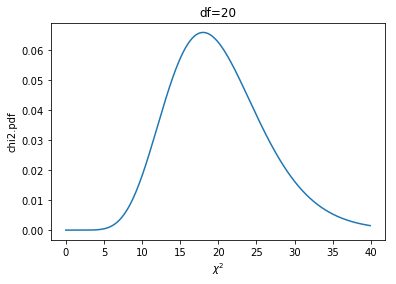

In [7]:
df=20
x=np.arange(0,2*df,0.1)

plt.plot(x,chi2.pdf(x,df=df))
plt.xlabel('$\chi^2$')
plt.ylabel('chi2.pdf')
plt.title('df='+str(df))